![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

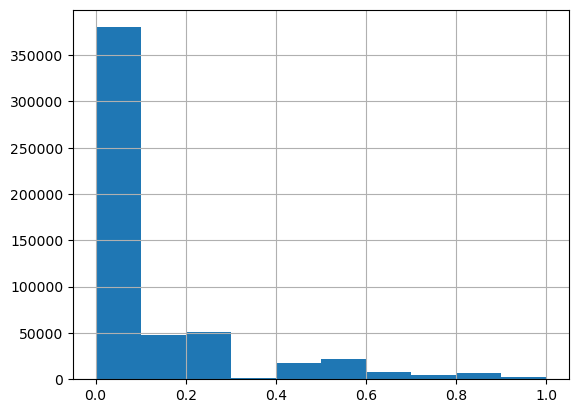

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

Se puede observar que la distribución se encuentra desbalanceada, por lo que se puede decir que la distribución de los comentarios toxicos es muy baja.

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Descripción de la longitud de los comentarios:
count    541462.000000
mean        297.391015
std         269.486412
min           1.000000
25%          94.000000
50%         202.000000
75%         414.000000
max        1737.000000
Name: length, dtype: float64


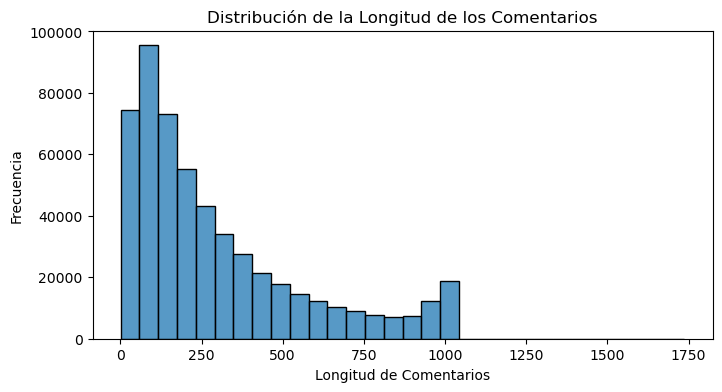

In [9]:
df['length'] = df['comment_text'].str.len()
print("Descripción de la longitud de los comentarios:")
print(df['length'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df['length'], bins=30)
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Longitud de Comentarios')
plt.ylabel('Frecuencia')
plt.show()

* La longitud de los comentarios en promedio es de 297 caracteres.
* Hay un total de 541462 comentarios.
*  Hay una variabilidad significativa en la longitud de los comentarios con una desviación estándar de aproximadamente 270 caracteres.
*  La distribución está sesgada hacia la derecha, lo que significa que hay menos comentarios largos, pero estos podrían ser muy extensos.

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
def evaluar_modelos(X_train, X_test, y_train, y_test, modelos):
    resultados = {}
    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        
        resultados[nombre] = {'modelo': modelo, 'mse': mse}
    
    mejor_modelo = min(resultados, key=lambda x: resultados[x]['mse'])
    
    return resultados, mejor_modelo

In [11]:
vectorizador = CountVectorizer()
x_train_t = vectorizador.fit_transform(X_train)
X_test_t = vectorizador.transform(X_test)

In [12]:
#modelos = {
#    'Regresión Lineal': LinearRegression(),
#    'Ridge': Ridge(alpha=0.1),
#    'Lasso': Lasso(alpha=0.1),
#    'Árbol de Decisión': DecisionTreeRegressor()
#}

# Aplicar la función
#resultados, mejor_modelo = evaluar_modelos(x_train_t, X_test_t, y_train, y_test, modelos)

# Imprimir resultados
#for modelo, resultado in resultados.items():
#    print(f"Modelo: {modelo}, MSE: {resultado['mse']}")
    
#print(f"\nMejor modelo: {mejor_modelo}, MSE: {resultados[mejor_modelo]['mse']}")



Para seleccionar el modelo adecuado, se realizó una funcion para probar distinos modelos como son: Regresión lineal, Ridge, Lasso y arboles de decisión. Se obtuvieron los siguientes resultados:

* Modelo: Regresión Lineal, MSE: 0.03715971674789688
* Modelo: Ridge, MSE: 0.03165206668054347
* Modelo: Lasso, MSE: 0.03903365870182593
* Modelo: Árbol de Decisión, MSE: 0.033516160074976306

A parti de esto se pudo encontrar que el mejo MSE es para el modelo Ridge, por lo que se selecciona por su mejor desempeño.

In [13]:
def evaluar_modelos_con_alpha(X_train, X_test, y_train, y_test, alphas):
    resultados = {}
    for alpha in alphas:
        modelo = Ridge(alpha=alpha)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        resultados[alpha] = {'modelo': modelo, 'mse': mse}
    
    mejor_alpha = min(resultados, key=lambda x: resultados[x]['mse'])
    
    return resultados, mejor_alpha

alphas = [0.01, 0.1, 1, 10, 100]

#resultados_alpha, mejor_alpha = evaluar_modelos_con_alpha(x_train_t, X_test_t, y_train, y_test, alphas)

#for alpha, resultado in resultados_alpha.items():
#    print(f"Alpha: {alpha}, MSE: {resultado['mse']}")

#print(f"\nMejor alpha: {mejor_alpha}, MSE: {resultados_alpha[mejor_alpha]['mse']}")

Se realiza función para determinar el ajuste del alpha, que en este caso dió 100. 

In [14]:
modelo = RidgeCV(alphas = [100], cv=2)
modelo.fit(x_train_t, y_train)

y_pred = modelo.predict(X_test_t)

mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

Error Cuadrático Medio (MSE): 0.022750875666230564


Se usa CountVectorizer para convertir el texto a una matriz de tokens, se obtiene un mse de 0.022

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
vectorizador_2 = CountVectorizer(ngram_range=(3, 3))
x_train_t_2 = vectorizador_2.fit_transform(X_train)
X_test_t_2 = vectorizador_2.transform(X_test)

modelo_2 =  RidgeCV(alphas = [100], cv=2)
modelo_2.fit(x_train_t_2, y_train)

y_pred_2 = modelo_2.predict(X_test_t_2)

mse_2 = mean_squared_error(y_test, y_pred_2)
print(f"Error Cuadrático Medio (MSE): {mse_2}")


Error Cuadrático Medio (MSE): 0.035523825939966475


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

## TfidfVectorizer
La función TfidVectorizer TF-IDF (Frecuencia de término Frecuencia de documento inversa) de forma similar CountVectorizer entrega una matriz con los tokens del input. Sin embargo, CountVectorizer genera la matriz con los tokens únicos y un conteo de la cantidad de veces que aparecen en todo el input, por lo que asigna la misma importancia a todos los tokens, dando mayor peso aquellas palabras que mas se repitan. Esto, en muchos casos puede ser negativo, ya que se le da mas peso a palabras de alta frecuencia pero de poco valor explicativo como conectores como: de,en,se,etc. Por otro lado con el fin de evitar este problema la función TfidVectorizer crea una medida que ayuda a evaluar la importancia de una palabra dentro de un documento, para hacerlo implementa dos segmentos en su ejecución. 

* TF: Frecuencia de términos (Term Frequency): Es la frecuencia de un término en un documento en específico, se calcula como la cantidad de veces que un término aparece en el documento divido por el total de términos que tiene el documento.
    * $$TF = \frac{\text{Número de repeticiones de la palabra en la oración}}{\text{Número de palabras en la oración}}$$

* IDF: Frecuencia inversa de documento (Inverse Document Frequency): Ayuda a disminuir el peso de los términos que se repiten mucho y aumenta el peso de los términos que no aparecen frecuentemente. Se calcula como el logaritmo del número total de documentos dividido por el número de documentos que contienen el término De esta forma se centra en la importancia de una palabra en todo el cuerpo del documento.
    * $$IDF = \log\left(\frac{\text{Número de líneas del documento}}{\text{Número de líneas que contienen la palabra}}\right)$$
    * Otra forma de explicar IDF es que este término penaliza aquellas palabras más se repiten en el documento, esto porque se usa la función logaritmo en base 10, la cual es una función creciente, por lo que entre menos aparezca la palabra en todo el documento, mayor peso tendrá en este término, y entre más aparezca, más se acercara este término a 0.
    * 
Finalmente, el valor que toma la palabra con el TfidfVectorizer corresponde al producto de estos dos términos. Por lo que al final el valor es una combinación de la frecuencia de las palabras dentro de cada línea y una penalización por el numero de repeticiones dentro de todas las líneas..

### Ventajas:
* Debido a que ayuda a darle un menor peso a las palabras más comun (incluso asignando un peso de cero a palabras muy generales como contectores que no agregan información a la predicción)es y un mayor peso a las palabracon menos repeticiones, reduce la complejidad del modelo y favorece su poder predictivo.
* La penalización de las palabras comunes reduce el peso de palabras con poco valor informativo muy repetitivas como los conectores, mientras que, el CountVectorizer les da bastante peso a estas palabras simplemente por su alta frecuencia, lo que no siempre es bueno para el modelo.

### Desventajas:
* Suele tener mayor demanda computacional, ya que implica realizar cálculos más complejos que el simple conteo que realiza el CountVectorizer.
* Riesgo en perdida de la información debido a que el algoritmo discrimina las palabras más comunes.
* Puede no funcionar muy bien en conjuntos de datos pequeños y/ o muy  específicos. Por su algoritmo de funcionamiento puede llegar a asignar pesos de forma inadecuada debido a la escasez de datos y esto se ve aún más agravado cuando las palabras son muy infrecuentes y aparecen en muy pocas líneas. Es por esto que, tiende a funcionar mejor en conjuntos de datos grandes y con términos más generales que específicos.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 4
tfi_vector = TfidfVectorizer()
X_train_tf = tfi_vector.fit_transform(X_train)
X_test_tf = tfi_vector.transform(X_test)

modelo_3 = RidgeCV(alphas = [100], cv=2)
modelo_3.fit(X_train_tf, y_train)

y_pred_3 = modelo_3.predict(X_test_tf)
mse_3 = mean_squared_error(y_test, y_pred_3)
print(f"Error Cuadrático Medio (MSE): {mse_3}")

Error Cuadrático Medio (MSE): 0.02574520588105205


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

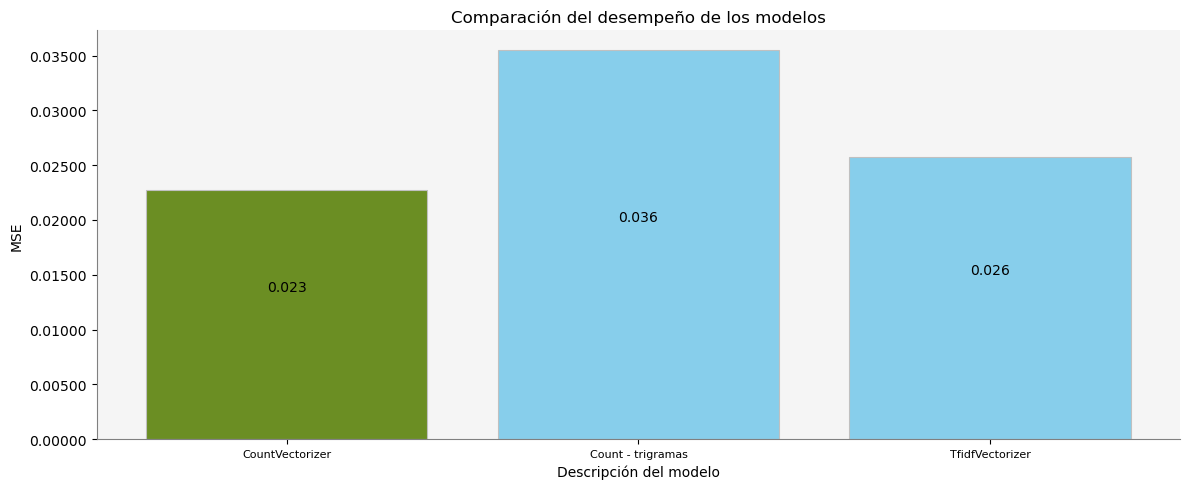

In [17]:
# Celda 5
def compararModelos(models, data, score):
    better = min(data)
    colores = ['#87CEEB' if value != better else '#6B8E23' for value in data]
    fig, ax = plt.subplots(figsize=(12,5))
    bar = ax.bar(models, data, linewidth=0.8, color=colores, edgecolor="silver")
    ax.set_title("Comparación del desempeño de los modelos")
    ax.set_xlabel("Descripción del modelo")
    ax.set_ylabel(score)
    bar_labels = [f'{value:.3f}' for value in data] 
    ax.bar_label(bar, bar_labels, label_type='center', padding=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor("whitesmoke")
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")
    ax.tick_params(axis='x', labelsize=8)
    plt.gca().yaxis.set_major_formatter('{:,.5f}'.format)
    plt.tight_layout()
    plt.show()

modelos = ["CountVectorizer", "Count - trigramas","TfidfVectorizer"]
mses = [mse,mse_2,mse_3]

compararModelos(modelos, mses, "MSE")

### Resultados: 

Es importante hacer énfasis en como los métodos de tokenización disponibilizan un abanico de opciones por medio de estructuras de datos que se componen principalmente de texto para el modelaje predictivo del lenguaje natural. 

Es decir, los datos implementados para realizar el modelo en el presente laboratorio poseen una estructura poco convencional y compleja de abordar sin realizar algún procedimiento de preprocesamiento de texto como la tokenización implementada. Así, se puede concluir que el proceso de tokenización es una herramienta efectiva y bastante útil que debe ser siempre considerada al momento de plantear un algoritmo predictivo en estructuras de datos basadas en texto.

Como es posible observar, para este set de datos, el mejor modelo obtenido fue el modelo calibrado de regresión Ridge y con preprocesamiento de texto en los datos de entrenamiento y pruebas por medio de la función CountVectorizer usando los parámetros predeterminados de la función, este modelo obtiene el menor MSE comparados con el modelo de tokenización de trigramas y el modelo de tokenización usando la técnica de TF-IDF, siendo el peor desempeño el obtenido con trigramas.
  
Esto evidencia la influencia e importancia del preprocesamiento de texto previo a la implementación del modelo y como es importante también iterar sobre distintas posibilidades, hasta encontrar el preprocesamiento que asegure el mejor desempeño. Es decir, en ningún momento se asegura mejor desempeño a través de una función u otra, por lo que la elección de que función usar para tokenizar y los parámetros a usar en la función se convierten en un nuevo paso de calibración (además de los hiper parámetros regulares del modelo de predicción escogido). En este caso el preprocesamiento que nos aseguró un mejor desempeño fue el modelo más simple, sin embargo, no era intuitivo que así fuera y hubo la necesidad de comprobar la inferioridad en desempeño a través de otros hiper parámetros y funciones para hacer la selección.

En este contexto la simplicidad del CountVectorizer resultó ser adecuada, es decir, los trigramas terminan siendo contraproducentes, la introducción de más contexto en este caso fue contraproducente, obteniendo el peor de los resultados por medio de este preprocesamiento; también lo fue la introducción de los pesos por medio de la función TfidVectorizer. Esto podría ser explicado porque los pesos se están distribuyendo de manera errónea y un contexto tan especifico seguramente existen palabras muy repetitivas en cada línea con alto valor explicativo que están siendo muy penalizadas, por lo que se les resta importancia al momento de predecir.
